In [108]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import scipy.stats as st
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('dataSetofHeights.csv')

In [4]:
data.head()

,Heights,Gender
0,160.377337,Male
1,177.637818,Male
2,166.258270,Male
3,182.467287,Male
4,182.368534,Male


In [11]:
data.groupby('Gender').describe()

Heights                                                            \
         count        mean       std         min         25%         50%   
Gender                                                                     
Female   500.0  161.574051  6.918344  143.501854  156.654409  161.346158   
Male     500.0  175.038659  7.354337  155.197703  170.229677  175.336793   

                                
               75%         max  
Gender                          
Female  166.593762  183.851727  
Male    180.106521  197.707840

In [13]:
data['Heights'].mean()

168.30635473929422

<AxesSubplot:ylabel='Heights'>

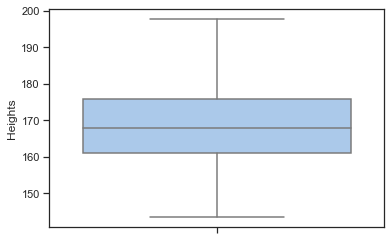

In [141]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(
    #x= 'Gender',
    y= 'Heights',
    data = data
)

<AxesSubplot:xlabel='Heights', ylabel='Density'>

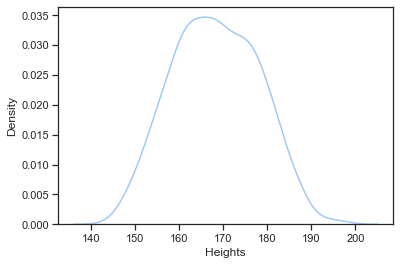

In [140]:

sns.kdeplot(
    #hue= 'Gender',
    x= 'Heights',
    data = data,
)

- step 1: Plantear las Hipotesis
- step 2: seleccionar estadistico de prueba
- step 3: definir el nivel de significancia o error tipo I $\alpha$ as .05
- step 4: Reglas de decisión - valores criticos
- Step 5: Poner a prueba las hipotesis


#### 1) Planteas Hipotesis

Hipotesis a comprobar:

$$H_{o}: \space \space  \mu = 170$$
$$H_{a}: \space \space  \mu \ne 170$$

#### 2) Definir estadistico de prueba

Estadistico de Prueba:

$$z= \frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt n}}$$

#### 3 y 4 Valores Criticos y Nivel de Significancia

La siguiente función de scipy.stat devuelve el valor de Z para una determinada probabilidad.

In [86]:
st.norm.ppf(0.05)


-1.6448536269514729

La siguiente función de scipy.stat devuelve el valor de probabilidad para un determinado valor de Z.

In [87]:
st.norm.cdf(-1.65)

0.0494714680336481

En el caso del ejemplo el nivel de significancia (alfa) es del 5% (0.05), pero como es una prueba bilateral el valor a buscar es 0.025.

Lado izquierdo:

In [133]:
limInferior = st.norm.ppf(0.025)
limInferior

-1.9599639845400545

Lado derecho:

In [134]:
limSuperior = st.norm.ppf(1-0.025)
limSuperior

1.959963984540054

*La zona de aceptación de H0 esta entre -1.96 y 1.96*

##### 5) Tomar muestra de la población

De el total de poblacion en el dataset (1000 registros) extraigo una muestra de 70 registros

In [127]:
muestra = data['Heights'][np.argsort(np.random.random(1000))[:70]]

In [128]:
muestra.head()

394    174.064405
963    165.445831
452    172.248973
457    179.172740
128    176.857368
Name: Heights, dtype: float64

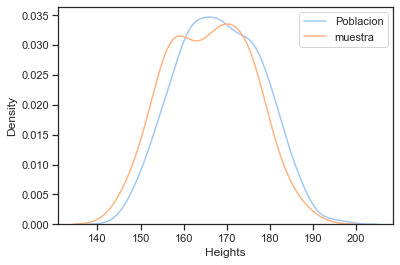

In [129]:
sns.kdeplot(
    x= 'Heights',
    data = data, 
    label= 'Poblacion'
)

sns.kdeplot(
    x= muestra,
    label= 'muestra'
)

plt.legend()

Estadisticos para obtener el valor de Z de la muestra:

In [130]:
mediaMuestra = muestra.mean()
mediaHipotesisNula = 170
N= 70
desvioStandarPoblacion = np.std(data['Heights'])


Z de la muestra:

In [132]:
Zmuestra = (mediaMuestra-mediaHipotesisNula) / (desvioStandarPoblacion/np.sqrt(N))
Zmuestra

-3.5092498774957193

Criterio de aceptación: 

In [139]:
(Zmuestra >= limInferior) & (Zmuestra <= limSuperior)

False

https://stackoverflow.com/questions/20864847/probability-to-z-score-and-vice-versa